# Rf 4 0 2_Datahandling

Data and categories: tools for manipulation of (un)binned datasets




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:52 AM.</small></i>

In [1]:
from __future__ import print_function
import ROOT
import math

Welcome to JupyROOT 6.18/03


WVE Add reduction by range

Binned (RooDataHist) and unbinned datasets (RooDataSet) share
many properties and inherit from a common abstract base class
(RooAbsData), provides an interface for all operations
that can be performed regardless of the data format

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)
y = ROOT.RooRealVar("y", "y", 0, 40)
c = ROOT.RooCategory("c", "c")
c.defineType("Plus", +1)
c.defineType("Minus", -1)

False


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Basic operations on unbinned datasetss
--------------------------------------------------------------

ROOT.RooDataSet is an unbinned dataset (a collection of points in
N-dimensional space)

In [3]:
d = ROOT.RooDataSet("d", "d", ROOT.RooArgSet(x, y, c))

Unlike ROOT.RooAbsArgs (ROOT.RooAbsPdf, ROOT.RooFormulaVar,....) datasets are not attached to
the variables they are constructed from. Instead they are attached to an internal
clone of the supplied set of arguments

Fill d with dummy values

In [4]:
for i in range(1000):
    x.setVal(i / 50 - 10)
    y.setVal(math.sqrt(1.0 * i))
    if (i % 2):
        c.setLabel("Plus")
    else:
        c.setLabel("Minus")

    # We must explicitly refer to x,y, here to pass the values because
    # d is not linked to them (as explained above)
    print(x, y, c)
    print(type(x))
    d.add(ROOT.RooArgSet(x, y, c))

d.Print("v")
print("")

RooRealVar::x = -10  L(-10 - 10) 
 RooRealVar::y = 0  L(0 - 40) 
 RooCategory::c = Minus(idx = -1)


<class 'ROOT.RooRealVar'>
RooRealVar::x = -10  L(-10 - 10) 
 RooRealVar::y = 1  L(0 - 40) 
 RooCategory::c = Plus(idx = 1)


<class 'ROOT.RooRealVar'>
RooRealVar::x = -10  L(-10 - 10) 
 RooRealVar::y = 1.41421  L(0 - 40) 
 RooCategory::c = Minus(idx = -1)


<class 'ROOT.RooRealVar'>
RooRealVar::x = -10  L(-10 - 10) 
 RooRealVar::y = 1.73205  L(0 - 40) 
 RooCategory::c = Plus(idx = 1)


<class 'ROOT.RooRealVar'>
RooRealVar::x = -10  L(-10 - 10) 
 RooRealVar::y = 2  L(0 - 40) 
 RooCategory::c = Minus(idx = -1)


<class 'ROOT.RooRealVar'>
RooRealVar::x = -10  L(-10 - 10) 
 RooRealVar::y = 2.23607  L(0 - 40) 
 RooCategory::c = Plus(idx = 1)


<class 'ROOT.RooRealVar'>
RooRealVar::x = -10  L(-10 - 10) 
 RooRealVar::y = 2.44949  L(0 - 40) 
 RooCategory::c = Minus(idx = -1)


<class 'ROOT.RooRealVar'>
RooRealVar::x = -10  L(-10 - 10) 
 RooRealVar::y = 2.64575  L(0 - 40) 
 RooCategory::c = Plus

The get() function returns a pointer to the internal copy of the RooArgSet(x,y,c)
supplied in the constructor

In [5]:
row = d.get()
row.Print("v")
print("")


  1) 0x55cbe6661060 RooRealVar:: x = 9  L(-10 - 10)  "x"
  2) 0x55cbe666d670 RooRealVar:: y = 31.607  L(0 - 40)  "y"
  3) 0x55cbe748e790 RooCategory:: c = Plus(idx = 1)
  "c"


Get with an argument loads a specific data point in row and returns
a pointer to row argset. get() always returns the same pointer, unless
an invalid row number is specified. In that case a null ptr is returned

In [6]:
d.get(900).Print("v")
print("")


  1) 0x55cbe6661060 RooRealVar:: x = 8  L(-10 - 10)  "x"
  2) 0x55cbe666d670 RooRealVar:: y = 30  L(0 - 40)  "y"
  3) 0x55cbe748e790 RooCategory:: c = Minus(idx = -1)
  "c"


Reducing, appending and merging
-------------------------------------------------------------

The reduce() function returns a dataset which is a subset of the
original

In [7]:
print("\n >> d1 has only columns x,c")
d1 = d.reduce(ROOT.RooArgSet(x, c))
d1.Print("v")

print("\n >> d2 has only column y")
d2 = d.reduce(ROOT.RooArgSet(y))
d2.Print("v")

print("\n >> d3 has only the points with y>5.17")
d3 = d.reduce("y>5.17")
d3.Print("v")

print("\n >> d4 has only columns x, for data points with y>5.17")
d4 = d.reduce(ROOT.RooArgSet(x, c), "y>5.17")
d4.Print("v")


 >> d1 has only columns x,c

 >> d2 has only column y

 >> d3 has only the points with y>5.17

 >> d4 has only columns x, for data points with y>5.17
DataStore d (d)
  Contains 1000 entries
  Observables: 
    1)  x = 9  L(-10 - 10)  "x"
    2)  c = Plus(idx = 1)
  "c"
DataStore d (d)
  Contains 1000 entries
  Observables: 
    1)  y = 31.607  L(0 - 40)  "y"
DataStore d (d)
  Contains 973 entries
  Observables: 
    1)  x = 9  L(-10 - 10)  "x"
    2)  y = 31.607  L(0 - 40)  "y"
    3)  c = Plus(idx = 1)
  "c"
DataStore d (d)
  Contains 973 entries
  Observables: 
    1)  x = 9  L(-10 - 10)  "x"
    2)  c = Plus(idx = 1)
  "c"


The merge() function adds two data set column-wise

In [8]:
print("\n >> merge d2(y) with d1(x,c) to form d1(x,c,y)")
d1.merge(d2)
d1.Print("v")


 >> merge d2(y) with d1(x,c) to form d1(x,c,y)
DataStore d (d)
  Contains 1000 entries
  Observables: 
    1)  x = 9  L(-10 - 10)  "x"
    2)  c = Plus(idx = 1)
  "c"
    3)  y = 31.607  L(0 - 40)  "y"


The append() function addes two datasets row-wise

In [9]:
print("\n >> append data points of d3 to d1")
d1.append(d3)
d1.Print("v")


 >> append data points of d3 to d1
DataStore d (d)
  Contains 1973 entries
  Observables: 
    1)  x = 9  L(-10 - 10)  "x"
    2)  c = Plus(idx = 1)
  "c"
    3)  y = 31.607  L(0 - 40)  "y"


Operations on binned datasets
---------------------------------------------------------

A binned dataset can be constructed empty, an unbinned dataset, or
from a ROOT native histogram (TH1,2,3)

In [10]:
print(">> construct dh (binned) from d(unbinned) but only take the x and y dimensions, ")
print(">> the category 'c' will be projected in the filling process")

>> construct dh (binned) from d(unbinned) but only take the x and y dimensions, 
>> the category 'c' will be projected in the filling process


The binning of real variables (like x,y) is done using their fit range
'get/setRange()' and number of specified fit bins 'get/setBins()'.
Category dimensions of binned datasets get one bin per defined category
state

In [11]:
x.setBins(10)
y.setBins(10)
dh = ROOT.RooDataHist("dh", "binned version of d", ROOT.RooArgSet(x, y), d)
dh.Print("v")

yframe = y.frame(ROOT.RooFit.Bins(10), ROOT.RooFit.Title(
    "Operations on binned datasets"))
dh.plotOn(yframe)  # plot projection of 2D binned data on y

<ROOT.RooPlot object ("frame_y_55cbf0359370") at 0x55cbf0359370>

DataStore dh (binned version of d)
  Contains 100 entries
  Observables: 
    1)  x = 9  L(-10 - 10) B(10)  "x"
    2)  y = 31.607  L(0 - 40) B(10)  "y"
Binned Dataset dh (binned version of d)
  Contains 100 bins with a total weight of 1000
  Observables:     1)  x = 9  L(-10 - 10) B(10)  "x"
    2)  y = 31.607  L(0 - 40) B(10)  "y"


Examine the statistics of a binned dataset

In [12]:
print(">> number of bins in dh   : ", dh.numEntries())
print(">> sum of weights in dh   : ", dh.sum(ROOT.kFALSE))

>> number of bins in dh   :  100
>> sum of weights in dh   :  1000.0


accounts for bin volume

In [13]:
print(">> integral over histogram: ", dh.sum(ROOT.kTRUE))

>> integral over histogram:  8000.0


Locate a bin from a set of coordinates and retrieve its properties

In [14]:
x.setVal(0.3)
y.setVal(20.5)
print(">> retrieving the properties of the bin enclosing coordinate (x,y) = (0.3,20.5) bin center:")

>> retrieving the properties of the bin enclosing coordinate (x,y) = (0.3,20.5) bin center:


load bin center coordinates in internal buffer

In [15]:
dh.get(ROOT.RooArgSet(x, y)).Print("v")
print(" weight = ", dh.weight())  # return weight of last loaded coordinates

 weight =  76.0
  1) 0x55cbe481bfe0 RooRealVar:: x = 1  L(-10 - 10) B(10)  "x"
  2) 0x55cbe481d9a0 RooRealVar:: y = 22  L(0 - 40) B(10)  "y"


Reduce the 2-dimensional binned dataset to a 1-dimensional binned dataset

All reduce() methods are interfaced in RooAbsData. All reduction techniques
demonstrated on unbinned datasets can be applied to binned datasets as
well.

In [16]:
print(">> Creating 1-dimensional projection on y of dh for bins with x>0")
dh2 = dh.reduce(ROOT.RooArgSet(y), "x>0")
dh2.Print("v")

>> Creating 1-dimensional projection on y of dh for bins with x>0
DataStore dh (binned version of d)
  Contains 10 entries
  Observables: 
    1)  y = 38  L(0 - 40) B(10)  "y"
Binned Dataset dh (binned version of d)
  Contains 10 bins with a total weight of 500
  Observables:     1)  y = 38  L(0 - 40) B(10)  "y"


Add dh2 to yframe and redraw

In [17]:
dh2.plotOn(yframe, ROOT.RooFit.LineColor(ROOT.kRed),
           ROOT.RooFit.MarkerColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_y_55cbf0359370") at 0x55cbf0359370>

[#1] INFO:Plotting -- RooPlot::updateFitRangeNorm: New event count of 500 will supercede previous event count of 1000 for normalization of PDF projections


Saving and loading from file
-------------------------------------------------------

Datasets can be persisted with ROOT I/O

In [18]:
print("\n >> Persisting d via ROOT I/O")
f = ROOT.TFile("rf402_datahandling.root", "RECREATE")
d.Write()
f.ls()


 >> Persisting d via ROOT I/O
TFile**		rf402_datahandling.root	
 TFile*		rf402_datahandling.root	
  KEY: RooDataSet	d;1	d
  KEY: TProcessID	ProcessID0;1	067b449a-ca08-11e9-a85a-8b68b8bcbeef


To read back in future session:
> ROOT.TFile f("rf402_datahandling.root")
> d = (ROOT.RooDataSet*) f.FindObject("d")

In [19]:
c = ROOT.TCanvas("rf402_datahandling", "rf402_datahandling", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
yframe.GetYaxis().SetTitleOffset(1.4)
yframe.Draw()

c.SaveAs("rf402_datahandling.png")

Info in <TCanvas::Print>: png file rf402_datahandling.png has been created


Draw all canvases 

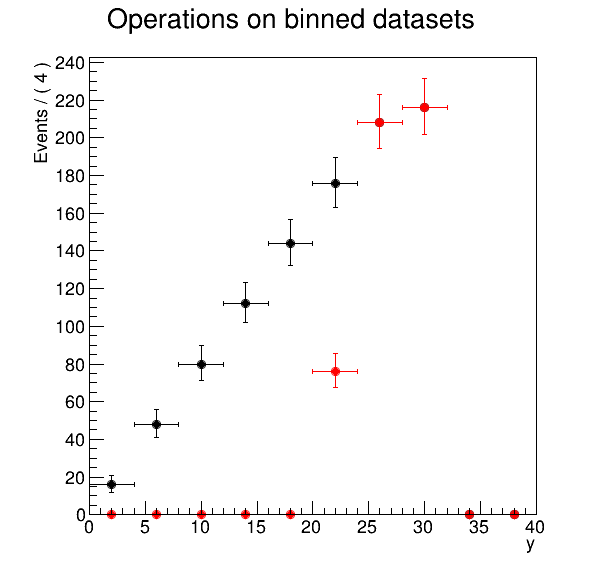

In [20]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()